# Horseshoe Sparse Prior
https://github.com/ksnxr/SSGRLDNDM/tree/master

---- Finished running SGLD ----
---- Finished running ZSGLD ----


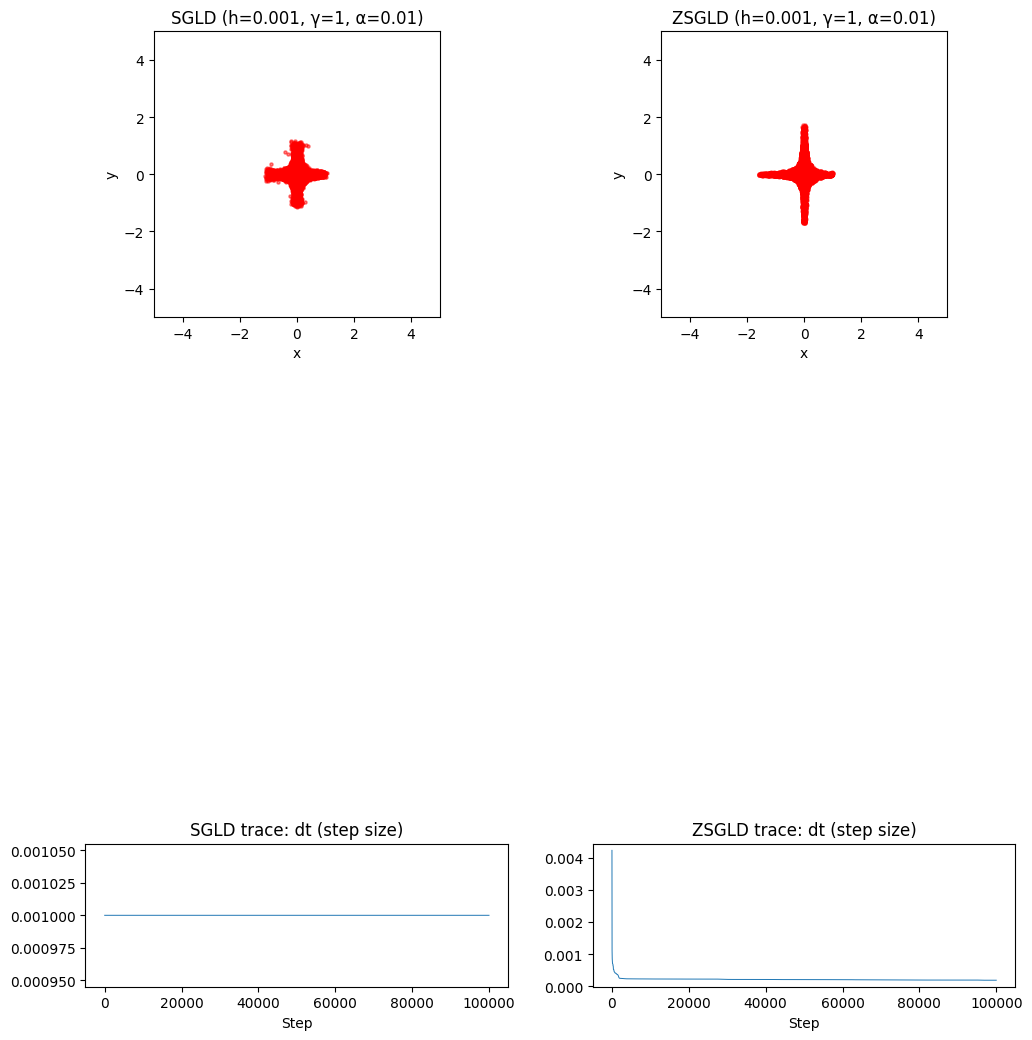

In [4]:
import numpy as np, math
from numba import njit, vectorize, float64
from ipywidgets import interact, FloatLogSlider
import warnings
warnings.filterwarnings("ignore")
from viz import plot_samplers, plot_samplers_first_order
from ipywidgets import fixed
from scipy.special import exp1


###############################################################################################
# Horseshoe prior:
# x ~ N(0, lambda * sigma), simga ~ half-Cauchy(0, 1)
# lamb = 1
# @njit
# def grad_U(z):
#     y, x = z
#     a_x = x ** 2 / (2 * lamb**2)
#     a_y = y ** 2 / (2 * lamb**2)
#     a_x = np.clip(a_x, None, 732) # scipy.special.exp1 turns to inf when the argument is too large
#     a_y = np.clip(a_y, None, 732)
#     grad_x = - (x / (lamb**2)) * (1 - np.exp(-a_x) / (a_x * exp1(a_x)))
#     grad_y = - (y / (lamb**2)) * (1 - np.exp(-a_y) / (a_y * exp1(a_y)))
#     return np.array([grad_y, grad_x])
#
# # @njit
# def log_p(y, x):
#     a_x = x ** 2 / (2 * lamb**2)
#     a_y = y ** 2 / (2 * lamb**2)
#     a_x = np.clip(a_x, None, 732)
#     a_y = np.clip(a_y, None, 732)
#     # up to a constant:
#     return a_x + np.log(exp1(a_x)) + a_y + np.log(exp1(a_y))

# print(log_p(0.5, 0.5))
# print(log_p(10, 10))

###############################################################################################

###############################################################################################
# Laplace distribution: x, y ~ Laplace(mu, beta)
# mu_x, mu_y = 0, 0
# b_x, b_y = 1, 1
#
# @njit
# def grad_U(z):
#     y, x = z
#     grad_x = np.sign(x - mu_x) / b_x
#     grad_y = np.sign(y - mu_y) / b_y
#     return np.array([grad_y, grad_x])
#
# @njit
# def log_p(y, x):
#     return - np.log(4 * b_x * b_y) - np.abs(x - mu_x) / b_x - np.abs(y - mu_y) / b_y
###############################################################################################

def grad_U(z):
    y, x = z
    grad_x = 2 * x  + 2000 * x * y ** 2
    grad_y = 2 * y  + 2000 * y * x ** 2
    return np.array([grad_y, grad_x])

# @njit
def log_p(y, x):
    return - x ** 2 + 1000 * x ** 2 * y ** 2 - y ** 2

xs = np.linspace(-5, 5, 100)
ys = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(xs, ys)
LOGZ = log_p(Y, X)
vmax, vmin = LOGZ.max(), LOGZ.max() - 40
levels = np.linspace(vmin, vmax, 60)
m, M, r, s = 0.1, 10, 0.25, 2
b = 1 # BAOAB stepsize multiplier
burnin = int(1)
nsteps = int(1e5)

# plot_samplers(
#     alpha=0.01,
#     h=0.01,
#     gamma=1,
#     beta=1,
#     grad_U=grad_U,
#     X=X,
#     Y=Y,
#     LOGZ=LOGZ,
#     levels=levels,
#     m=m,
#     M=M,
#     r=r,
#     s=s,
#     b=b,
#     burnin=burnin,
#     nsteps=nsteps,
#     record_trace=True,
#     plot_stride=1)

plot_samplers_first_order(
    alpha=0.01,
    h=0.001,
    gamma=1,
    beta=1.,
    grad_U=grad_U,
    X=X,
    Y=Y,
    LOGZ=LOGZ,
    levels=levels,
    m=m,
    M=M,
    r=r,
    s=s,
    b=b,
    burnin=burnin,
    nsteps=nsteps,
    record_trace=True,
    plot_stride=1)
